## **Import**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
# Ignore the warning for using plot confusion matrix
import warnings
warnings.filterwarnings("ignore")

## **Feature Selection**

In [17]:
df = pd.read_csv("cleaned.csv")

# Drop unnecessary features
df = df.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)

# Feature variable
X = df.drop('DEATH_EVENT', axis=1)

# Target Variable
y = df['DEATH_EVENT']

print(f'Shape of X: {X.shape} and Y: {y.shape}')

Shape of X: (299, 5) and Y: (299,)


## **Split Training/Testing Datasets with Stratification**

In [16]:
# 70% Training and 30% testing sets
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=42,
                                stratify=y)

print('Training Data')
print(f'Shape of X_train: {X_train_70.shape} and Y_train: {y_train_70.shape}')
print('Testing Data')
print(f'Shape of X_test: {X_test_30.shape} and Y_test: {y_test_30.shape}')

Training Data
Shape of X_train: (209, 5) and Y_train: (209,)
Testing Data
Shape of X_test: (90, 5) and Y_test: (90,)


In [18]:
# 80% Training and 20% testing sets
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

print('Training Data')
print(f'Shape of X_train: {X_train_80.shape} and Y_train: {y_train_80.shape}')
print('Testing Data')
print(f'Shape of X_test: {X_test_20.shape} and Y_test: {y_test_20.shape}')

Training Data
Shape of X_train: (239, 5) and Y_train: (239,)
Testing Data
Shape of X_test: (60, 5) and Y_test: (60,)


In [19]:
# 90% Training and 10% testing sets
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X,
                                y,
                                test_size=0.1,
                                random_state=42)

print('Training Data')
print(f'Shape of X_train: {X_train_90.shape} and Y_train: {y_train_90.shape}')
print('Testing Data')
print(f'Shape of X_test: {X_test_10.shape} and Y_test: {y_test_10.shape}')

Training Data
Shape of X_train: (269, 5) and Y_train: (269,)
Testing Data
Shape of X_test: (30, 5) and Y_test: (30,)


## **Standardization of Features**

In [20]:
scaler = StandardScaler()

X_train_70_scaled = scaler.fit_transform(X_train_70)
X_test_30_scaled = scaler.transform(X_test_30)

X_train_80_scaled = scaler.fit_transform(X_train_80)
X_test_20_scaled = scaler.transform(X_test_20)

X_train_90_scaled = scaler.fit_transform(X_train_90)
X_test_10_scaled = scaler.transform(X_test_10)

## **Logistic Regression**

Accuracy of logistic regression classifier using 70% training data:  83.3333
F1 score for 70% training data 71.6981 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90
 



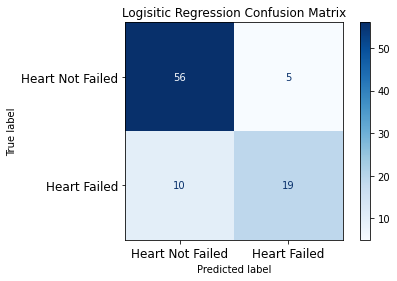

In [87]:
# Instantiate the classifier
logreg = LogisticRegression()

# Fit the classifier
logreg.fit(X_train_70_scaled, y_train_70)

# Predict instances from the test set
logreg_y_pred = logreg.predict(X_test_30_scaled)

logreg_accuracy = round(logreg.score(X_test_30_scaled, y_test_30)*100, 4)
logreg_f1_score = round(f1_score(y_test_30, logreg_y_pred)*100, 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 70% training data", logreg_f1_score, "\n")

print(classification_report(y_test_30.values, logreg_y_pred), "\n")

plot_confusion_matrix(logreg, X_test_30_scaled, y_test_30, cmap=plt.cm.Blues)
plt.title("Logisitic Regression Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [88]:
logreg_y_test = np.array(y_test_30)
logreg_result_compare = np.concatenate((logreg_y_test.reshape(len(y_test_30), 1), logreg_y_pred.reshape(len(logreg_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(logreg_result_compare)

Outcome, Prediction
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [89]:
logreg_prediction_error_list = []
logreg_failed_error_list = []
logreg_not_failed_error_list = []

for pair in logreg_result_compare: 

  if pair[0] != pair[1]:
    logreg_prediction_error_list.append(pair)

for error in logreg_prediction_error_list:

  if error[0] == 0:
    logreg_not_failed_error_list.append(error[0])

  else:
    logreg_failed_error_list.append(error[0])

logreg_prediction_error = len(logreg_prediction_error_list)
logreg_failed_error = len(logreg_failed_error_list)
logreg_not_failed_error = len(logreg_not_failed_error_list)

print("Wrong Predictions:", logreg_prediction_error)
print("Alive, but predicted dead:", logreg_not_failed_error)
print("Dead, but predicted alive:", logreg_failed_error)

Wrong Predictions: 15
Alive, but predicted dead: 5
Dead, but predicted alive: 10


Accuracy of logistic regression classifier using 80% training data:  78.3333
F1 score for 80% training data 66.6667 

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60
 



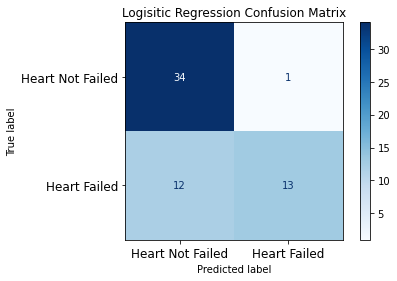

In [32]:
# Fit the classifier
logreg.fit(X_train_80_scaled, y_train_80)

# Predict instances from the test set
logreg_y_pred = logreg.predict(X_test_20_scaled)

logreg_accuracy = round(logreg.score(X_test_20_scaled, y_test_20)*100, 4)
logreg_f1_score = round(f1_score(y_test_20, logreg_y_pred)*100, 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 80% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 80% training data", logreg_f1_score, "\n")

print(classification_report(y_test_20.values, logreg_y_pred), "\n")

plot_confusion_matrix(logreg, X_test_20_scaled, y_test_20, cmap=plt.cm.Blues)
plt.title("Logisitic Regression Confusion Matrix")  
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

Accuracy of logistic regression classifier using 90% training data:  76.6667
F1 score for 90% training data 58.8235 

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.42      0.59        12

    accuracy                           0.77        30
   macro avg       0.86      0.71      0.71        30
weighted avg       0.83      0.77      0.74        30
 



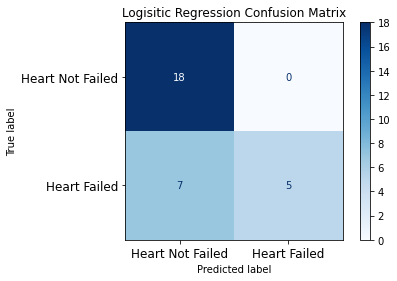

In [33]:
# Fit the classifier
logreg.fit(X_train_90_scaled, y_train_90)

# Predict instances from the test set
logreg_y_pred = logreg.predict(X_test_10_scaled)

logreg_accuracy = round(logreg.score(X_test_10_scaled, y_test_10)*100, 4)
logreg_f1_score = round(f1_score(y_test_10, logreg_y_pred)*100, 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 90% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 90% training data", logreg_f1_score, "\n")

print(classification_report(y_test_10.values, logreg_y_pred), "\n")

plot_confusion_matrix(logreg, X_test_10_scaled, y_test_10, cmap=plt.cm.Blues)
plt.title("Logisitic Regression Confusion Matrix") 
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

## **Decision Tree**

Accuracy of logistic regression classifier using 70% training data:  78.8889
F1 score for 70% training data 65.4545 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        61
           1       0.69      0.62      0.65        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90
 



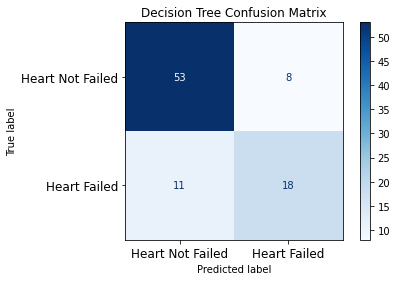

In [46]:
dt = DecisionTreeClassifier()

# Fit the classifier
dt.fit(X_train_70_scaled, y_train_70)

dt_y_pred = dt.predict(X_test_30_scaled)

dt_accuracy = round(dt.score(X_test_30_scaled, y_test_30)*100, 4)
dt_f1_score = round(f1_score(y_test_30, dt_y_pred)*100, 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", dt_accuracy)

# Print the F1 score
print("F1 score for 70% training data", dt_f1_score, "\n")

print(classification_report(y_test_30.values, dt_y_pred), "\n")

plot_confusion_matrix(dt, X_test_30_scaled, y_test_30, cmap=plt.cm.Blues)  
plt.title("Decision Tree Confusion Matrix")  
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [47]:
dt_y_test = np.array(y_test_30)
dt_result_compare = np.concatenate((dt_y_test.reshape(len(y_test_30), 1), dt_y_pred.reshape(len(dt_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(dt_result_compare)

Outcome, Prediction
[[0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]]


In [48]:
dt_prediction_error_list = []
dt_failed_error_list = []
dt_not_failed_error_list = []

for pair in dt_result_compare: 

  if pair[0] != pair[1]:
    dt_prediction_error_list.append(pair)

for error in dt_prediction_error_list:

  if error[0] == 0:
    dt_not_failed_error_list.append(error[0])

  else:
    dt_failed_error_list.append(error[0])

dt_prediction_error = len(dt_prediction_error_list)
dt_failed_error = len(dt_failed_error_list)
dt_not_failed_error = len(dt_not_failed_error_list)

print("Wrong Predictions:", dt_prediction_error)
print("Alive, but predicted dead:", dt_not_failed_error)
print("Dead, but predicted alive:", dt_failed_error)

Wrong Predictions: 19
Alive, but predicted dead: 8
Dead, but predicted alive: 11


## **Random Forest**

Accuracy of logistic regression classifier using 70% training data:  81.1111
F1 score for 70% training data 69.0909 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        61
           1       0.73      0.66      0.69        29

    accuracy                           0.81        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.81      0.81      0.81        90
 



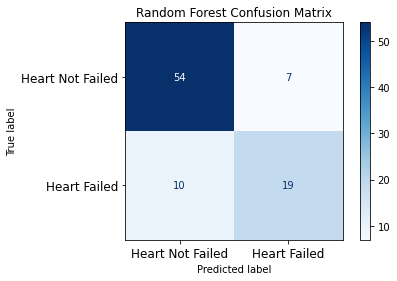

In [49]:
rf = RandomForestClassifier()

# Fit the classifier
rf.fit(X_train_70_scaled, y_train_70)

rf_y_pred = rf.predict(X_test_30_scaled)

rf_accuracy = round(rf.score(X_test_30_scaled, y_test_30)*100, 4)
rf_f1_score = round(f1_score(y_test_30, rf_y_pred)*100, 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", rf_accuracy)

# Print the F1 score
print("F1 score for 70% training data", rf_f1_score, "\n")

print(classification_report(y_test_30.values, rf_y_pred), "\n")

plot_confusion_matrix(rf, X_test_30_scaled, y_test_30, cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")   
plt.xticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Failed"], fontsize=12)
plt.show()

In [50]:
rf_y_test = np.array(y_test_30)
rf_result_compare = np.concatenate((rf_y_test.reshape(len(y_test_30), 1), rf_y_pred.reshape(len(rf_y_pred), 1)), 1)
print("Outcome,", "Prediction")
print(rf_result_compare)

Outcome, Prediction
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


In [51]:
rf_prediction_error_list = []
rf_failed_error_list = []
rf_not_failed_error_list = []

for pair in rf_result_compare: 

  if pair[0] != pair[1]:
    rf_prediction_error_list.append(pair)

for error in rf_prediction_error_list:

  if error[0] == 0:
    rf_not_failed_error_list.append(error[0])

  else:
    rf_failed_error_list.append(error[0])

rf_prediction_error = len(rf_prediction_error_list)
rf_failed_error = len(rf_failed_error_list)
rf_not_failed_error = len(rf_not_failed_error_list)

print("Wrong Predictions:", rf_prediction_error)
print("Alive, but predicted dead:", rf_not_failed_error)
print("Dead, but predicted alive:", rf_failed_error)

Wrong Predictions: 17
Alive, but predicted dead: 7
Dead, but predicted alive: 10


## **Summary of Accuracy and F1 Score**

In [90]:
accuracy_list = [logreg_accuracy, dt_accuracy, rf_accuracy]
f1_score_list = [logreg_f1_score, dt_f1_score, rf_f1_score]

models = ["Logisitic Regression", "Decision Tree", "Random Forest"]

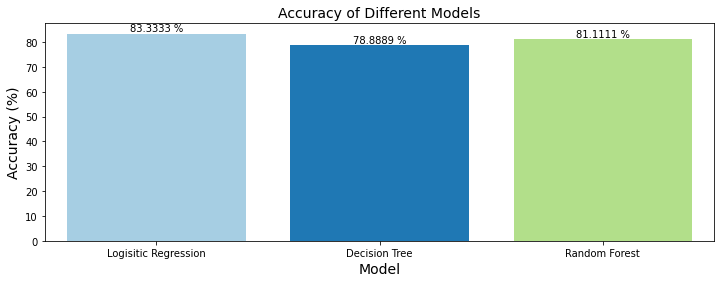

In [91]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = accuracy_list, palette = "Paired", saturation = 2.0)
plt.title("Accuracy of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Accuracy (%)", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

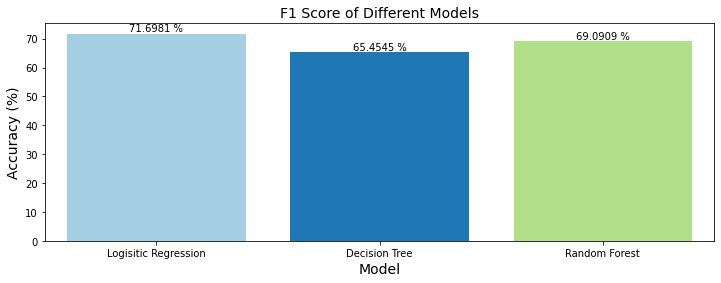

In [92]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = f1_score_list, palette = "Paired", saturation = 2.0)
plt.title("F1 Score of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Accuracy (%)", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

## **Summary of Wrong Predictions**

In [93]:
prediction_error_list = [logreg_prediction_error, dt_prediction_error, rf_prediction_error]
failed_error_list = [logreg_failed_error, dt_failed_error, rf_failed_error]
not_failed_error_list = [logreg_not_failed_error, dt_not_failed_error, rf_not_failed_error]

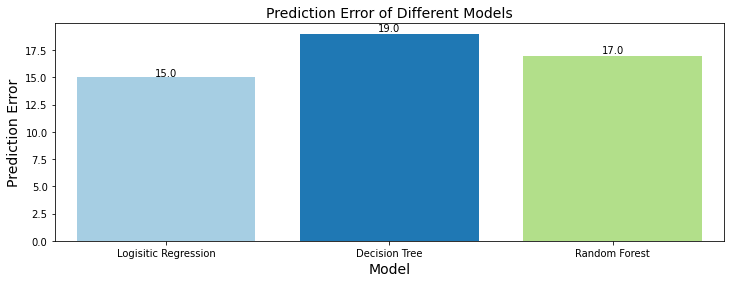

In [94]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = prediction_error_list, palette = "Paired", saturation = 2.0)
plt.title("Prediction Error of Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()

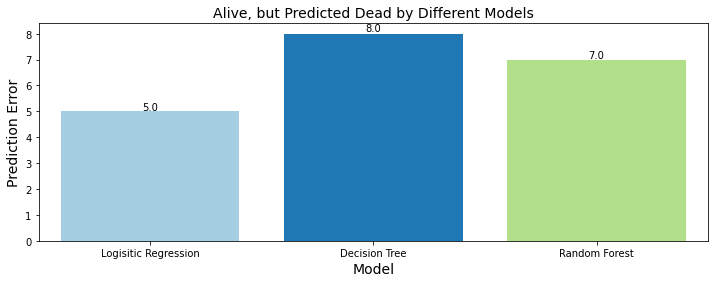

In [95]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = not_failed_error_list, palette = "Paired", saturation = 2.0)
plt.title("Alive, but Predicted Dead by Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()

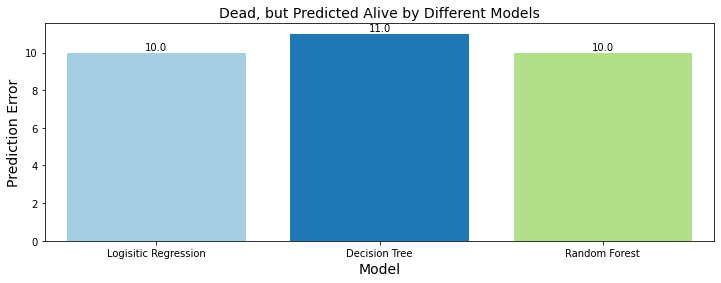

In [96]:
plt.figure(figsize = (12,4))

ax = sns.barplot(x = models, y = failed_error_list, palette = "Paired", saturation = 2.0)
plt.title("Dead, but Predicted Alive by Different Models", fontsize = 14)
plt.xlabel("Model", fontsize = 14)
plt.ylabel("Prediction Error", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}", (x + width/2, y + height*1.01), ha="center")

plt.show()

## **Feature Selection Techniques**

In [100]:
data = pd.read_csv("cleaned.csv")

# Independent columns
X = data.iloc[:, 0:12] 

# Target column
y = data.iloc[:, -1]

### **Univariate Selection**

In [101]:
# Apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func = chi2, k = 12)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)

# Naming the dataframe columns
featureScores.columns = ['Specs', 'Score']

# Print 12 best features
print(featureScores.nlargest(12, 'Score'))

                       Specs         Score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.572096
7           serum_creatinine     19.814118
8               serum_sodium      1.618175
5        high_blood_pressure      1.221539
1                    anaemia      0.746593
10                   smoking      0.032347
9                        sex      0.001956
3                   diabetes      0.000657


### **Feature Importance**


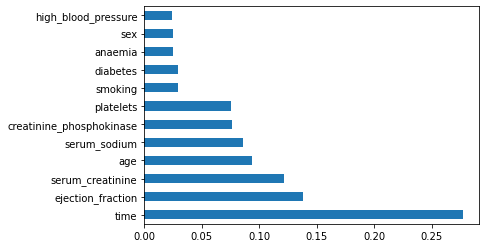

In [103]:
et = ExtraTreesClassifier()

et.fit(X,y)

# Plot graph of feature importances
feature_importances = pd.Series(et.feature_importances_, index = X.columns)
feature_importances.nlargest(12).plot(kind='barh')
plt.show()